# Cost function
- 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 한다.
- 따라서,  cost function 재정의
- Cost function 목표  = $Min(RSS(W) + alpha * \lVert W \rVert_2^2)$
- $RSS(w) = \sum_{i=1}^N (y_i - \sum_{j=0}^p w_j*x_{ij})^2$ (N x p)
- 최적 모델을 위한 Cost fucntion 구성요소 = 학습데이터 잔차 오류 최소화 + 회귀계수 크기 제어
## lambda
- 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터
- alpha = 0, cost function은 Min(Rss(w))
- alpha = Inf, W를 0에 가깝게 최소화 해야 함.
- alpha 를 0부터 지속적으로 값을 증가시키면 회귀 계수 값의 크기를 감소시킬 수 있다.
- alpha 값으로 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선.

# Ridge Regression(L2)
$$RSS(w) + alpha \sum_{j=0}^p w_j^2$$ $$for\,some\,c>0, \sum_{j=0}^p w_j^2 <c$$

- alpha[default : 1]

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['price'] = boston.target

X_data = boston_df.drop('price', axis = 1)
y_target = boston_df.price

In [8]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 fold 개별 RMSE score : ', np.round(rmse_scores,3))
print('5 fold 평균 RMSE score : ', np.round(avg_rmse,3))

5 fold 개별 RMSE score :  [3.38  4.929 5.305 8.637 5.34 ]
5 fold 평균 RMSE score :  5.518


In [9]:
alphas = [0,0.1,1,10,100]

for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target,  scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    
    print('alpha {0}일 때, 5folds 의 평균 rmse : {1:.3f}'.format(alpha, avg_rmse))

alpha 0일 때, 5folds 의 평균 rmse : 5.829
alpha 0.1일 때, 5folds 의 평균 rmse : 5.788
alpha 1일 때, 5folds 의 평균 rmse : 5.653
alpha 10일 때, 5folds 의 평균 rmse : 5.518
alpha 100일 때, 5folds 의 평균 rmse : 5.330


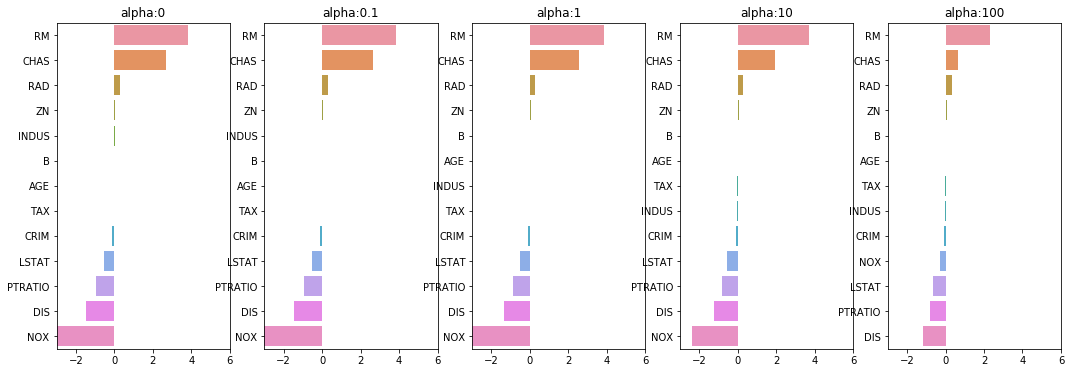

In [11]:
fig, axs = plt.subplots(figsize = (18,6), nrows = 1, ncols = 5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    
    coeff = pd.Series(data = ridge.coef_, index = X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axs[pos])
    
plt.show()

In [12]:
coeff_df

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
NOX,-17.766611,-16.684645,-10.777015,-2.371619,-0.262847
RM,3.809865,3.818233,3.854000,3.702272,2.334536
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
DIS,-1.475567,-1.459626,-1.372654,-1.248808,-1.153390
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856


- alpha 값을 증가시킬수록 회귀계수가 작아짐.
- 특히 NOX 변수
- 하지만, 0으로 만들지는 않는다.

# Lasso Regeression(L1)
$$RSS(w) + alpha \sum_{j=0}^p \left\vert w_j \right\vert$$ $$for\,some\,t>0, \sum_{j=0}^p \left\vert w_j \right\vert <t$$

- 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거. (피처 선택의 특성)
- alpha[default : 1]

In [14]:
from sklearn.linear_model import Lasso

In [15]:
def get_linear_reg_eval(model_name, params = None, X_data_n = None, y_target_n = None, verbose = True) :
    coeff_df = pd.DataFrame()
    
    if verbose : print('#####', model_name,'#####')
        
    for param in params :
        if model_name == 'Ridge' : model = Ridge(alpha = param)
        elif model_name == 'Lasso' : model = Lasso(alpha = param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha = param, l1_ratio = 0.7)
            
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring = 'neg_mean_squared_error', cv= 5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        
        print('alpha {0}일 때, 5fold average RMSE : {1:.3f}'.format(param, avg_rmse))
        
        model.fit(X_data_n, y_target_n)
        coeff = pd.Series(data = model.coef_, index = X_data.columns)
        colname = 'alpha:'+str(param)
        coeff_df[colname] = coeff
        
    return coeff_df

In [18]:
lasso_alphas = [0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n=X_data, y_target_n=y_target)

##### Lasso #####
alpha 0.07일 때, 5fold average RMSE : 5.612
alpha 0.1일 때, 5fold average RMSE : 5.615
alpha 0.5일 때, 5fold average RMSE : 5.669
alpha 1일 때, 5fold average RMSE : 5.776
alpha 3일 때, 5fold average RMSE : 6.189


In [21]:
#가장 best결과를 보여준 alpha = 0.07을 기준으로 정렬
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by = sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


- 불필요한 피처는 아예 0으로

![image](https://cdn-images-1.medium.com/max/1600/1*Jd03Hyt2bpEv1r7UijLlpg.png)

# ElasticNet
$$RSS(w) + alpha2 \sum_{j=0}^p w_j^2 + alpha1 \sum_{j=0}^p\left\vert w_j \right\vert$$

- L2 + L1
- alpha값에 따라 L2에서 회귀 계수으 ㅣ값이 급격히 변동될 수 있는 것을 방지하고자 L1 추가
- 상대적으로 오래 걸리다


- alpha[default : 1] : alpha1(L1의 alpha)
- l1_ratio[default : 0.5] : alpha1 / (alpha1 + alpha2)


- l1_ratio = 0, a = 0 (L2와 동일)
- l1_ratio = 1, b = 0 (L1과 동일)


In [24]:
from sklearn.linear_model import ElasticNet

In [25]:
#l1_ratio는 고정
elastic_alphas = [0.07,0.1,0.5,1.3]

coeff_elastic_df = get_linear_reg_eval('ElasticNet', params = elastic_alphas, X_data_n = X_data, y_target_n=y_target)

##### ElasticNet #####
alpha 0.07일 때, 5fold average RMSE : 5.542
alpha 0.1일 때, 5fold average RMSE : 5.526
alpha 0.5일 때, 5fold average RMSE : 5.467
alpha 1.3일 때, 5fold average RMSE : 5.670


In [27]:
#철번째 칼럼 순으로 정렬
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by = sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1.3
RM,3.574162,3.414154,1.918419,0.560937
CHAS,1.330724,0.979706,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.273045
ZN,0.050107,0.050617,0.052878,0.050578
B,0.010122,0.010067,0.009114,0.007957
AGE,-0.010116,-0.008276,0.007760,0.026241
TAX,-0.014522,-0.014814,-0.016046,-0.015689
INDUS,-0.044855,-0.042719,-0.023252,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.064928
NOX,-0.175072,-0.000000,-0.000000,-0.000000


- lasso모델보다 0이 되는 값들이 적음